In [3]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf
import seaborn as sns
import itertools

In [4]:
# read input
import csv

filename_train = "data/training_set_VU_DM_2014.csv"
filename_test = "data/training_set_VU_DM_2014.csv"

df_train = pd.read_csv(filename_train)
# df_exp = df_train.
# df_test = pd.read_csv(filename_test)

In [5]:
print("This dataset contains %d rows and %d columns" % df_train.shape)

This dataset contains 4958347 rows and 54 columns


In [6]:
df_sample = df_train.sample(frac=0.05)

In [7]:
df_sample.shape

(247917, 54)

In [8]:
print("The first 5 records in the dataset:")
df_sample.head()

The first 5 records in the dataset:


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2766418,185740,2013-06-27 15:43:00,12,99,3.83,222.66,99,110032,4,4.0,...,2.0,1.0,0.0,2.0,NaN,NaN,NaN,0,NaN,0
2717672,182415,2013-01-28 10:06:26,5,219,NaN,NaN,219,442,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4453816,298854,2013-04-05 08:17:50,5,219,NaN,NaN,219,25301,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1311987,87882,2013-03-19 07:19:29,7,100,NaN,NaN,219,66606,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2330432,156519,2012-11-09 13:13:13,14,100,NaN,NaN,31,59318,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [9]:
print("Statistical summary of columns in dataset:")
df_sampl.describe()

Statistical summary of columns in dataset:


NameError: name 'df_sampl' is not defined

In [28]:
print("Correlation matrix of the dataset:")
df_train.corr()

Correlation matrix of the dataset:


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,1.000000,0.003331,-0.006097,-0.010462,0.000316,-0.005468,-0.000166,-0.001577,-0.002959,-0.003828,...,0.007789,-0.002917,0.002822,0.003499,0.000073,-0.001070,0.000841,0.000194,0.000951,0.000487
site_id,0.003331,1.000000,-0.305921,0.309078,0.099104,-0.312593,0.002943,0.174845,-0.071645,-0.196217,...,-0.006023,-0.001217,-0.011761,-0.004750,0.012756,-0.005167,0.000152,0.008497,0.053015,-0.001354
visitor_location_country_id,-0.006097,-0.305921,1.000000,-0.256252,-0.073231,0.482787,0.000432,-0.112911,0.064279,0.182405,...,-0.012159,0.004379,-0.006172,-0.017498,-0.016626,0.010390,-0.001532,-0.004806,-0.048212,0.002524
visitor_hist_starrating,-0.010462,0.309078,-0.256252,1.000000,0.498618,-0.285770,0.007933,0.295903,-0.000815,-0.183249,...,0.002736,-0.001198,-0.005446,-0.001889,0.034486,0.000307,0.004346,0.002541,0.104260,-0.002044
visitor_hist_adr_usd,0.000316,0.099104,-0.073231,0.498618,1.000000,-0.073566,0.000575,0.153966,0.046391,-0.057195,...,-0.010555,0.004687,0.011371,-0.010601,0.006237,-0.002069,0.002971,0.003858,0.108476,0.000602
prop_country_id,-0.005468,-0.312593,0.482787,-0.285770,-0.073566,1.000000,0.000162,-0.161729,0.092686,0.310493,...,-0.041114,-0.007162,-0.061137,-0.024660,-0.031299,0.011225,-0.002427,-0.006222,-0.064152,0.001227
prop_id,-0.000166,0.002943,0.000432,0.007933,0.000575,0.000162,1.000000,0.002553,-0.000103,0.000922,...,0.012274,-0.005572,-0.002152,0.007769,0.003004,0.003048,-0.001985,0.000246,0.002713,-0.000508
prop_starrating,-0.001577,0.174845,-0.112911,0.295903,0.153966,-0.161729,0.002553,1.000000,0.306454,0.021329,...,-0.025211,-0.016826,-0.028579,-0.011136,0.037041,-0.030334,0.015429,0.030788,0.175424,0.021206
prop_review_score,-0.002959,-0.071645,0.064279,-0.000815,0.046391,0.092686,-0.000103,0.306454,1.000000,0.203949,...,-0.022200,-0.008081,0.003435,-0.009931,0.068148,-0.006711,0.006997,0.023424,0.076358,0.025800
prop_brand_bool,-0.003828,-0.196217,0.182405,-0.183249,-0.057195,0.310493,0.000922,0.021329,0.203949,1.000000,...,-0.087572,-0.002585,-0.062500,-0.036992,-0.011238,-0.057156,-0.001317,0.000866,-0.033181,0.009991


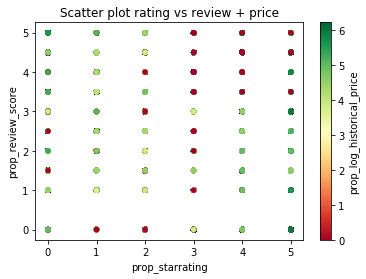

In [19]:
# Not as useful a plot as I thought it would be 😅
df_train.plot.scatter(x='prop_starrating', y='prop_review_score', c='prop_log_historical_price', colormap="RdYlGn", sharex=False, title="Scatter plot rating vs review + price")

In [32]:
print("People per country (id):")
df_train.groupby('prop_country_id')['srch_id'].count()

People per country (id):


prop_country_id
1           76
2         4495
4        19142
7           10
9         6843
10         724
11         366
13        4088
14       18827
15       23548
16        1561
17        3402
18       12976
19          24
20          75
21         140
22         879
23        6288
25          35
26        6511
27        2418
30        2450
31      154287
32       19667
33        2136
34         915
35       13395
37        1155
38         130
39       28054
        ...   
194       1508
195        339
196        364
197         38
200       1008
201        248
202      18850
203        159
204          5
205      29473
206       4351
207        213
208         13
211       3458
212       6453
213       3665
214        339
215      79981
216      61096
217         21
219    3030125
220      71115
221       6973
222         86
223       5809
224       4067
225      14351
226         21
229       1978
230       2620
Name: srch_id, Length: 172, dtype: int64

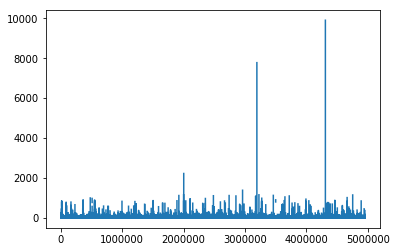

In [3]:
df_train.comp7_rate_percent_diff.plot()

In [12]:
df_train.groupby('srch_destination_id').count()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
2,48,48,48,48,0,0,48,48,48,48,...,13,24,28,15,0,0,0,48,2,48
3,8,8,8,8,0,0,8,8,8,8,...,0,0,0,0,0,0,0,8,0,8
5,8,8,8,8,0,0,8,8,8,8,...,0,4,5,2,0,0,0,8,0,8
7,13,13,13,13,0,0,13,13,13,13,...,0,0,0,0,0,0,0,13,1,13
8,17,17,17,17,17,17,17,17,17,17,...,1,16,16,6,0,0,0,17,1,17
9,32,32,32,32,0,0,32,32,32,32,...,0,0,0,0,0,0,0,32,1,32
10,31,31,31,31,0,0,31,31,31,31,...,0,0,0,0,0,0,0,31,1,31
12,599,599,599,599,95,95,599,599,599,599,...,0,0,0,0,309,322,83,599,16,599
14,30,30,30,30,0,0,30,30,30,30,...,0,0,0,0,25,26,8,30,2,30
